In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
f = input("Enter the name of your training dataset file: ")
f_in= open(f, "r")

Enter the name of your training dataset file: P3train.txt


In [26]:
df=pd.read_csv(f,delimiter='\t', header=None, names=['Feature1','Feature2','Outcome'])

In [27]:
df = df.iloc[1: , :]

In [28]:
df

,Feature1,Feature2,Outcome
1,0.131910,-0.513890,1.0
2,0.298960,0.619150,0.0
3,0.137670,0.575290,1.0
4,0.823160,0.275580,0.0
5,0.592740,-0.740500,0.0
...,...,...,...
81,-0.593890,0.005117,1.0
82,0.632650,-0.030612,0.0
83,-0.046659,0.816520,1.0
84,-0.161870,0.801900,1.0


In [29]:
X_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values

In [30]:
f_in.close()

In [31]:
f = input("Enter the name of the testing dataset file:\t")
f_in = open(f,"r")

Enter the name of the testing dataset file:	P3test.txt


In [32]:
df=pd.read_csv(f,delimiter='\t', header=None, names=['Feature1','Feature2','Outcome'])

In [33]:
df = df.iloc[1: , :]

In [34]:
df

,Feature1,Feature2,Outcome
1,0.350810,-0.579680,0.0
2,0.615780,0.728800,0.0
3,-0.115780,-0.396930,1.0
4,0.851960,-0.367690,0.0
5,-0.104260,0.991960,0.0
6,-0.150350,-0.367690,0.0
7,-0.236750,-0.214180,1.0
8,0.149190,-0.579680,0.0
9,0.517860,-0.594300,0.0
10,0.961410,0.085526,0.0


In [35]:
X_test = df.iloc[:, :-1].values
y_test = df.iloc[:, -1].values

In [36]:
print(X_test)

[[ 0.35081  -0.57968 ]
 [ 0.61578   0.7288  ]
 [-0.11578  -0.39693 ]
 [ 0.85196  -0.36769 ]
 [-0.10426   0.99196 ]
 [-0.15035  -0.36769 ]
 [-0.23675  -0.21418 ]
 [ 0.14919  -0.57968 ]
 [ 0.51786  -0.5943  ]
 [ 0.96141   0.085526]
 [-0.21371   0.69225 ]
 [ 0.322     0.69225 ]
 [ 0.16647   0.53874 ]
 [ 0.64459  -0.14108 ]
 [ 0.062788 -0.16301 ]
 [-0.39228  -0.25804 ]
 [ 0.18376   0.93348 ]
 [-0.51325   0.46564 ]
 [ 1.0709    0.10015 ]
 [ 0.52938  -0.5212  ]
 [-0.17339   0.69956 ]
 [ 0.72523   0.44371 ]
 [ 0.67339   0.64108 ]
 [-0.72638  -0.082602]
 [-0.83007   0.31213 ]
 [-0.59389   0.49488 ]
 [ 0.79435  -0.55775 ]
 [-0.47869   0.63377 ]
 [ 0.057028  0.91886 ]
 [ 0.46601  -0.53582 ]
 [-0.20795   0.35599 ]
 [-0.30588  -0.19225 ]
 [ 0.016705 -0.40424 ]]


In [37]:
print(y_test)

[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1.]


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]
accuracy=((TP+TN)/(TP+TN+FP+FN))*100
precision=(TP/(TP+FP))*100
recall=(TP/(TP+FN))*100
f1=2*(1/((1/precision)+(1/recall)))
print('\nTest Data:\n')
print("Confusion Matrix:")
print(cm)
print('Accuracy for test set = %d percent' %accuracy)
print('Precision for test set = %d percent' %precision)
print('Recall for test set = %d percent' %recall)
print('F1 for test set = %d percent' %f1)


Test Data:

Confusion Matrix:
[[17  0]
 [ 5 11]]
Accuracy for test set = 84 percent
Precision for test set = 100 percent
Recall for test set = 77 percent
F1 for test set = 87 percent


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


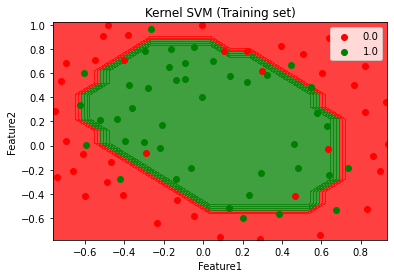

In [42]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.01, stop = X_set[:, 0].max() + 0.01, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 0.01, stop = X_set[:, 1].max() + 0.01, step = 0.1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


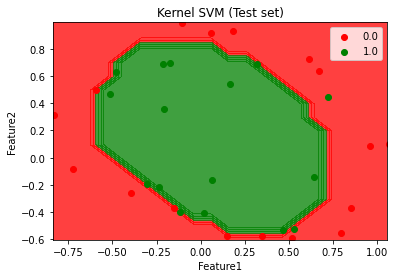

In [43]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.01, stop = X_set[:, 0].max() + 0.01, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 0.01, stop = X_set[:, 1].max() + 0.01, step = 0.1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()